In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
dataset = pd.read_csv('cod.csv',index_col='name')

In [3]:
dataset.head()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
name,,,,,,,,,,,,,,,,,,
RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1558 entries, RggRt45#4697369 to TomasFJ_05#2711069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wins            1558 non-null   int64  
 1   kills           1558 non-null   int64  
 2   kdRatio         1558 non-null   float64
 3   killstreak      1558 non-null   int64  
 4   level           1558 non-null   int64  
 5   losses          1558 non-null   int64  
 6   prestige        1558 non-null   int64  
 7   hits            1558 non-null   int64  
 8   timePlayed      1558 non-null   int64  
 9   headshots       1558 non-null   int64  
 10  averageTime     1558 non-null   float64
 11  gamesPlayed     1558 non-null   int64  
 12  assists         1558 non-null   int64  
 13  misses          1558 non-null   int64  
 14  xp              1558 non-null   int64  
 15  scorePerMinute  1558 non-null   float64
 16  shots           1558 non-null   int64  
 17  deaths    

In [5]:
dataset.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


In [6]:
dataset.drop_duplicates(inplace=True)

In [7]:
dataset.drop(dataset[dataset.timePlayed == 0].index, inplace=True)

dataset['hit_rate'] = (dataset.hits/dataset.shots)/dataset.timePlayed
dataset['miss_rate'] = (dataset.misses/dataset.shots)/dataset.timePlayed
dataset['headshot_rate'] = (dataset.headshots/dataset.shots)/dataset.timePlayed

dataset.replace([np.inf, -np.inf, np.nan], 0, inplace=True)


In [8]:
dataset.head(n=10)

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,...,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths,hit_rate,miss_rate,headshot_rate
name,,,,,,,,,,,,,,,,,,,,,
JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,7,0,...,0,0,0,700,0.000000,0,16,0.000000,0.000000,0.000000
bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,32,16,...,0,1,0,48300,0.000000,0,64,0.000000,0.000000,0.000000
JNaCo#5244172,3,2,0.400000,0,1,0,0,0,3,0,...,0,0,0,1150,0.000000,0,5,0.000000,0.000000,0.000000
gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,5,1,...,0,0,0,1000,0.000000,0,10,0.000000,0.000000,0.000000
Brxndoon7-LK#4002715,684,27011,1.066743,18,177,10,110,98332,1366,5113,...,588,6063,305319,3932335,255.672035,403651,25321,0.000178,0.000554,0.000009
bdooory_ab#7095171,4,162,0.632812,4,6,2,0,568,8,35,...,4,68,4836,24485,265.500000,5404,256,0.013138,0.111862,0.000810
ahevepluto#3505304,186,1898,0.569628,13,37,7,2,5111,550,485,...,150,488,39978,458269,180.379636,45089,3332,0.000206,0.001612,0.000020
MilkyLemonz-_-#5981249,741,21803,1.036658,26,185,29,111,81361,2442,3894,...,864,4029,327230,4269370,198.844226,408591,21032,0.000082,0.000328,0.000004
RPDUNKduo#8122914,26,349,0.444020,7,12,4,0,996,44,40,...,15,138,4844,72765,253.677273,5840,786,0.003876,0.018851,0.000156


In [9]:
del dataset['hits']
del dataset['misses']
del dataset['shots']
del dataset['headshots']
del dataset['timePlayed']
del dataset['averageTime']

dataset.head(n=10)

,wins,kills,kdRatio,killstreak,level,losses,prestige,gamesPlayed,assists,xp,scorePerMinute,deaths,hit_rate,miss_rate,headshot_rate
name,,,,,,,,,,,,,,,
JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,0,700,0.000000,16,0.000000,0.000000,0.000000
bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,1,48300,0.000000,64,0.000000,0.000000,0.000000
JNaCo#5244172,3,2,0.400000,0,1,0,0,0,0,1150,0.000000,5,0.000000,0.000000,0.000000
gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,0,1000,0.000000,10,0.000000,0.000000,0.000000
Brxndoon7-LK#4002715,684,27011,1.066743,18,177,10,110,588,6063,3932335,255.672035,25321,0.000178,0.000554,0.000009
bdooory_ab#7095171,4,162,0.632812,4,6,2,0,4,68,24485,265.500000,256,0.013138,0.111862,0.000810
ahevepluto#3505304,186,1898,0.569628,13,37,7,2,150,488,458269,180.379636,3332,0.000206,0.001612,0.000020
MilkyLemonz-_-#5981249,741,21803,1.036658,26,185,29,111,864,4029,4269370,198.844226,21032,0.000082,0.000328,0.000004
RPDUNKduo#8122914,26,349,0.444020,7,12,4,0,15,138,72765,253.677273,786,0.003876,0.018851,0.000156


In [10]:
data = dataset.iloc[:,1:].valuesx s
data

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.60000000e+01, 1.03125000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 4.00000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [5.10000000e+01, 4.32203390e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.22222222e-01, 7.77777778e-01, 0.00000000e+00],
       [3.50000000e+01, 6.86274510e-01, 3.00000000e+00, ...,
        2.12500000e-02, 7.87500000e-02, 7.50000000e-03]])

In [11]:
preprocessor = Pipeline(
    [
        ("standardize", StandardScaler()),
        ("pca", PCA(n_components=2,random_state=42)),
    ]
)

clusterer = Pipeline(
   [
       (
           "kmeans",
           KMeans(
               n_clusters=4,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           ),
       ),
   ]
)

In [12]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer)
    ]
)

In [13]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('standardize', StandardScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=4, n_init=50,
                                         random_state=42))]))])

In [14]:
preprocessed_data = pipe["preprocessor"].transform(data)
preprocessed_data

array([[-1.91800016, -1.16955462],
       [-1.31967506, -1.23280829],
       [-2.06024712, -0.56600377],
       ...,
       [-1.62908301, -1.1990132 ],
       [-3.57941642, 10.87671426],
       [-1.52444037,  0.08051536]])

In [15]:
silhouette_scores = []
inertia_scores = []
for n in range(2, 6):
    for k in range(2, 6):
        pipe["preprocessor"]["pca"].n_components = n
        pipe["clusterer"]["kmeans"].n_clusters = k
        pipe.fit(data)
        silhouette_coef = silhouette_score(
             pipe["preprocessor"].transform(data),
             pipe["clusterer"]["kmeans"].labels_,)

        silhouette_scores.append([n,k,silhouette_coef])

df = pd.DataFrame(silhouette_scores, columns=['n','k','score'] )

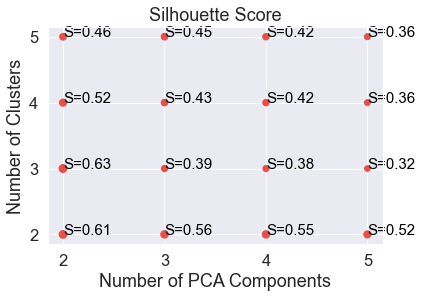

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = df['n'].values
y = df['k'].values
z = df['score'].values

ax.scatter(x,y,s=z*100)
ax.set_xlabel('Number of PCA Components')
ax.set_ylabel('Number of Clusters')
ax.set_title('Silhouette Score')
for i in range(len(z)):
    ax.text(x[i],y[i],f'S={z[i].round(2)}',size=15, zorder=1, color='k')

In [17]:
conditions = [
    (dataset['level'] < 50),
    (dataset['level'] >= 50) & (dataset['level'] < 150),
    (dataset['level'] >= 150)]
choices = ['Level 0', 'Level 1', 'Level 2']
lbls = np.select(conditions, choices, default=0)

C:\Users\Yeswanth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Comparing resulted categories with the player level.'),
 Text(0.5, 0, 'PCA component 1'),
 Text(0, 0.5, 'PCA component 2')]

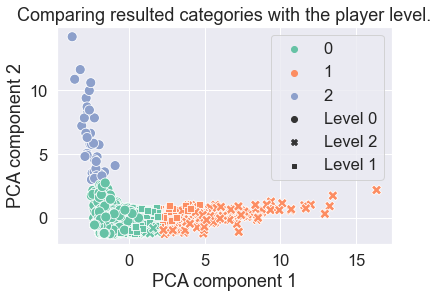

In [18]:
pipe["preprocessor"]["pca"].n_components = 2
pipe["clusterer"]["kmeans"].n_clusters = 3
pipe.fit(data)
output_labels = pipe["clusterer"]["kmeans"].labels_

sns.scatterplot(preprocessed_data[:,0], preprocessed_data[:,1], hue=output_labels, style=lbls, s=100, palette="Set2").set(title='Comparing resulted categories with the player level.',xlabel='PCA component 1', ylabel='PCA component 2')

In [19]:
myDict = {0: "Intermediate", 1: "Professional", 2: "Beginner"}
dataset['Category'] = [myDict[x] for x in output_labels]

In [20]:
dataset

,wins,kills,kdRatio,killstreak,level,losses,prestige,gamesPlayed,assists,xp,scorePerMinute,deaths,hit_rate,miss_rate,headshot_rate,Category
name,,,,,,,,,,,,,,,,
JohniceRex#9176033,0,0,0.000000,0,1,0,110,0,0,700,0.000000,16,0.000000,0.000000,0.000000,Intermediate
bootybootykill#1892064,0,66,1.031250,0,9,0,110,0,1,48300,0.000000,64,0.000000,0.000000,0.000000,Intermediate
JNaCo#5244172,3,2,0.400000,0,1,0,0,0,0,1150,0.000000,5,0.000000,0.000000,0.000000,Intermediate
gomezyayo_007#6596687,0,2,0.200000,0,1,0,110,0,0,1000,0.000000,10,0.000000,0.000000,0.000000,Intermediate
Brxndoon7-LK#4002715,684,27011,1.066743,18,177,10,110,588,6063,3932335,255.672035,25321,0.000178,0.000554,0.000009,Professional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bimo09#9025166,408,7530,0.799873,12,77,8,28,259,1792,1208952,296.200288,9414,0.000253,0.001188,0.000009,Intermediate
JermWormy#5125402,1173,45764,1.078627,20,289,14,111,1232,7133,8740718,214.819438,42428,0.000073,0.000233,0.000004,Professional
ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,0,49935,0.000000,118,0.000000,0.000000,0.000000,Intermediate
